In [62]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
import numpy as np
import pandas as pd

In [64]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [68]:
# Creating an Engine Using SQL Lite File/Data
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [70]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [71]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [72]:
# Get a list of column names and types
inspector = inspect(engine)
inspector.get_table_names()

columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [73]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [75]:
table_names=inspector.get_table_names()
table_names

['measurement', 'station']

In [76]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [77]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [18]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores


#Get the data for the last year
prcp_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23")\
            .filter(Measurement.date <= "2017-08-23").order_by(Measurement.date).all()
prcp_year

# Save the query results as a Pandas DataFrame and set the index to the date column
date = [x[0] for x in prcp_year]
prcp = [x[1] for x in prcp_year]

prcp_df = pd.DataFrame({"Date":date,
                      "Precepition":prcp})


# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
prcp_df

,Date,Precepition
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
13,2016-08-24,1.45
12,2016-08-24,2.15
11,2016-08-24,1.22


In [19]:
#Use Pandas to calcualte the summary statistics for the precipitation data. I would want to see this first as it will give me
#an idea of how the graph should like
prcp_df.describe()

,Precepition
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
prcp_df.set_index('Date').head()

,Precepition
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


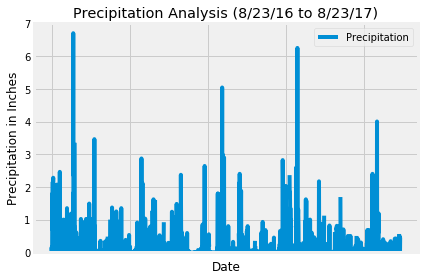

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
#This plot is not useful as it doesn't show it by month and very little information we can gather from it. 

prcp_df.plot('Date', 'Precepition')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.ylim(0,7)
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

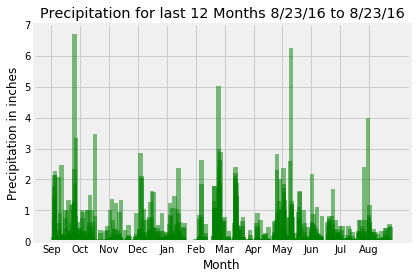

In [33]:
#Replot in order to be able to make conclusions on the data

plt.title("Precipitation for last 12 Months 8/23/16 to 8/23/16")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")

# We want to have the information by Months in order to be able to analyze the data 
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]


# Put the Precepition values into a list and set up the x axis to have the dates grouped into months
y = prcp_df["Precepition"].tolist()
x = np.arange(0, len(prcp_df.index.tolist()), 1)

# Get the month labels and their positioning
total_months = len(y)
#Multiply by 1.03 to make up for the months starting on the 23rd
month_labels= int((total_months / 12)*1.03)
plt.ylim = max(y) + 1
label_locations = [x for x in range(1, total_months, month_labels)]

# Define plot
plt.bar(x, y, width=30, color="green", alpha=0.5, align="edge")
plt.xticks(label_locations, months)

plt.show()

In [39]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(Measurement.station).distinct().count()

#Print it out nice
print(f"Stations Available: {number_stations} ")

Stations Available: 9 


In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity=session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Finding most active station 

#Store Station ID for the most active 
idstation_most_active=station_activity[0][0]
#Print it out nice
print(f"Most Active Station id: {idstation_most_active}")

USC00519281_station_calcs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == idstation_most_active).all()
USC00519281_station_calcs

#Print it out nice
print(f"Most Active Station Temperatures")
print(f"Low: {USC00519281_station_calcs[0][0]} High: {USC00519281_station_calcs[0][1]} Average: {round(USC00519281_station_calcs[0][2], 1)}")

Most Active Station id: USC00519281
Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


In [60]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_most_temps=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_most_temps
idstation_most_temps=station_most_temps[0][0]
#Print it out nice
print(f"Most Temperature Station id: {idstation_most_temps}")

Most Temperature Station id: USC00519281


In [79]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_station_temps=session.query( Measurement.tobs).filter(Measurement.date >= "2016-08-23")\
            .filter(Measurement.date <= "2017-08-23").filter(Measurement.station == idstation_most_temps).all()

temps_df = pd.DataFrame(USC00519281_station_temps, columns=['temperature'])

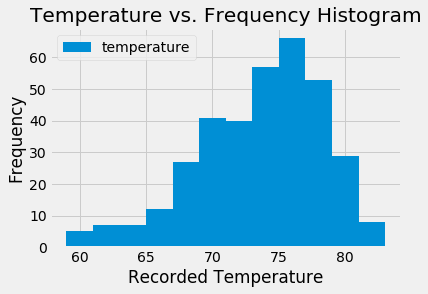

In [81]:
# We need 12 bins since the observation is for twelve months
temps_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10,6]
plt.xlabel('Recorded Temperature')
plt.savefig("Images/TemperaturevsFrequency.png")
plt.show()

In [113]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
vacation_temps=calc_temps('2016-12-15', '2016-12-30')

print(vacation_temps)
print(f"Low: {vacation_temps[0][0]} High: {vacation_temps[0][1]} Average: {round(vacation_temps[0][2], 1)}")

[(60.0, 71.625, 78.0)]
Low: 60.0 High: 71.625 Average: 78.0


In [127]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
vacation_calcs=calc_temps('2015-12-15', '2015-12-30')
vacation_calcs_df = pd.DataFrame(vacation_calcs, columns=["TMIN","TAVR", "TMAX"])
vacation_calcs_df


,TMIN,TAVR,TMAX
0,67.0,73.840426,82.0


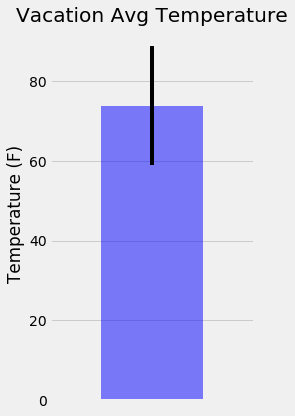

In [128]:
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

vacation_calcs_df.plot.bar(y="TAVR", yerr=(vacation_calcs_df["TMAX"] - vacation_calcs_df["TMIN"]), title="Vacation Avg Temperature", color="blue", alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Images/TripAvgTemp.png")
plt.show()


In [129]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precipitation(start_date, end_date):
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()
print(precipitation("2016-12-15","2016-12-30"))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.14), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.07), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.03), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.02), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


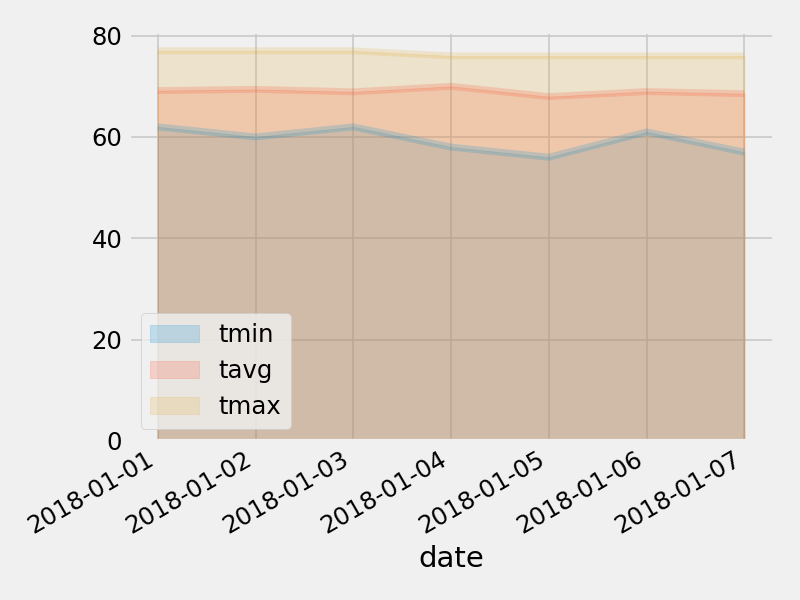

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
